In [1]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-10-15 18:37:00--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.224.128.87, 13.224.128.33, 13.224.128.29, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.224.128.87|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



In [2]:
import pandas as pd
import numpy  as np

%matplotlib inline

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-10-15   15     10  2020     32       1             Afghanistan    AF   
1 2020-10-14   14     10  2020     66       0             Afghanistan    AF   
2 2020-10-13   13     10  2020    129       3             Afghanistan    AF   
3 2020-10-12   12     10  2020     96       4             Afghanistan    AF   
4 2020-10-11   11     10  2020      0       0             Afghanistan    AF   
5 2020-10-10   10     10  2020     10       1             Afghanistan    AF   
6 2020-10-09    9     10  2020     77       2             Afghanistan    AF   
7 2020-10-08    8     10  2020     68       1             Afghanistan    AF   
8 2020-10-07    7     10  2020     62       2             Afghanistan    AF   
9 2020-10-06    6     10  2020    145       5             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  \
0                  AFG   38041757.0         Asia   
1                  AFG   38041757.0         Asia   
2                  AFG   38041757.0         Asia   
3                  AFG   38041757.0         Asia   
4                  AFG   38041757.0         Asia   
5                  AFG   38041757.0         Asia   
6                  AFG   38041757.0         Asia   
7                  AFG   38041757.0         Asia   
8                  AFG   38041757.0         Asia   
9                  AFG   38041757.0         Asia   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                           1.992547           
1                                           1.945231           
2                                           1.811168           
3                                           1.503611           
4                                           1.251257           
5                                           1.343261           
6                                           1.332746           
7                                           1.172396           
8                                           1.059362           
9                                           1.083020

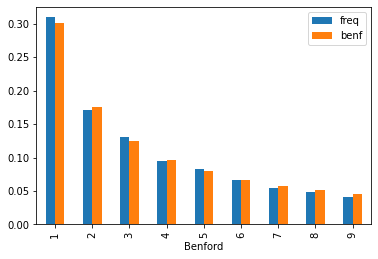

In [6]:
df['Benford'] = df[(df['cases'] > 0) & (df['continentExp'] == 'Europe')]['cases'].apply(lambda x: str(x)[0])
df['count'] = 1
df_benf = df[['Benford', 'count']].groupby(by='Benford').sum()
df_benf['freq'] = df_benf['count'] / df_benf['count'].sum()
df_benf['benf'] = np.log10(1 + 1 / df_benf.index.values.astype(float))
df_benf[['freq', 'benf']].plot(kind='bar')

In [5]:
KS = abs(df_benf['freq'].cumsum() - df_benf['benf'].cumsum()).max()
print('KS {:1.3f}'.format(KS))

KS 0.017
